In [1]:
# a. How often does the candidate who raised more money win a race?
# b. How often does the candidate who spent more money win a race?
# c. Does the difference between either money raised or money spent seem to influence the likelihood of a candidate winning a race?
# d. How often does the incumbent candidate win a race?
# e. Can you detect any relationship between amount of money raised and the incumbent status of a candidate?

In [14]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf

In [3]:
# read in dataset

hor = pd.read_csv(r"/Users/mauriaparker/Documents/NSS_Projects/Python/webscraping-open-secrets-scary-data-fest/data/HOR_2020.csv")
hor

,Candidate,Party,State,District,Incumbent,Winner,Percentage of Vote,Raised,Spent,Funds Remaining
0,Jerry Carl,(R),Alabama,District 01,False,True,64.9,1971321,1859349,111973
1,James Averhart,(D),Alabama,District 01,False,False,35.0,80095,78973,1122
2,Barry Moore,(R),Alabama,District 02,False,True,65.3,650807,669368,-13633
3,Phyllis Harvey-Hall,(D),Alabama,District 02,False,False,34.6,56050,55988,0
4,Mike D Rogers,(R),Alabama,District 03,True,True,67.5,1193111,1218564,502234
...,...,...,...,...,...,...,...,...,...,...
877,Tricia Zunker,(D),Wisconsin,District 07,False,False,39.2,1261957,1232690,29267
878,Mike Gallagher,(R),Wisconsin,District 08,True,True,64.0,3202905,2841801,1169362
879,Amanda Stuck,(D),Wisconsin,District 08,False,False,36.0,416978,399916,2165
880,Liz Cheney,(R),Wyoming,District 01,True,True,68.6,3003883,3060167,153567


In [4]:
# a) How often does the candidate who raised more money win a race?
# while state & district are the same & raised = max, check correlation with winner = true?
    # Tomo: get max per state & district, filter by winner = true

In [5]:
# rank by raised & create new column
hor['RaisedRank'] = hor.groupby(['State', 'District'])['Raised'].rank(ascending=False)
hor

,Candidate,Party,State,District,Incumbent,Winner,Percentage of Vote,Raised,Spent,Funds Remaining,RaisedRank
0,Jerry Carl,(R),Alabama,District 01,False,True,64.9,1971321,1859349,111973,1.0
1,James Averhart,(D),Alabama,District 01,False,False,35.0,80095,78973,1122,2.0
2,Barry Moore,(R),Alabama,District 02,False,True,65.3,650807,669368,-13633,1.0
3,Phyllis Harvey-Hall,(D),Alabama,District 02,False,False,34.6,56050,55988,0,2.0
4,Mike D Rogers,(R),Alabama,District 03,True,True,67.5,1193111,1218564,502234,1.0
...,...,...,...,...,...,...,...,...,...,...,...
877,Tricia Zunker,(D),Wisconsin,District 07,False,False,39.2,1261957,1232690,29267,2.0
878,Mike Gallagher,(R),Wisconsin,District 08,True,True,64.0,3202905,2841801,1169362,1.0
879,Amanda Stuck,(D),Wisconsin,District 08,False,False,36.0,416978,399916,2165,2.0
880,Liz Cheney,(R),Wyoming,District 01,True,True,68.6,3003883,3060167,153567,1.0


In [6]:
# create column making rank categorical across ranks(most or not)
hor['Top Raised'] = np.where(hor['RaisedRank'] == 1.0, True, False)
hor

,Candidate,Party,State,District,Incumbent,Winner,Percentage of Vote,Raised,Spent,Funds Remaining,RaisedRank,Top Raised
0,Jerry Carl,(R),Alabama,District 01,False,True,64.9,1971321,1859349,111973,1.0,True
1,James Averhart,(D),Alabama,District 01,False,False,35.0,80095,78973,1122,2.0,False
2,Barry Moore,(R),Alabama,District 02,False,True,65.3,650807,669368,-13633,1.0,True
3,Phyllis Harvey-Hall,(D),Alabama,District 02,False,False,34.6,56050,55988,0,2.0,False
4,Mike D Rogers,(R),Alabama,District 03,True,True,67.5,1193111,1218564,502234,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
877,Tricia Zunker,(D),Wisconsin,District 07,False,False,39.2,1261957,1232690,29267,2.0,False
878,Mike Gallagher,(R),Wisconsin,District 08,True,True,64.0,3202905,2841801,1169362,1.0,True
879,Amanda Stuck,(D),Wisconsin,District 08,False,False,36.0,416978,399916,2165,2.0,False
880,Liz Cheney,(R),Wyoming,District 01,True,True,68.6,3003883,3060167,153567,1.0,True


In [7]:
# Cross tabulation between Top Raised and Winner 

CrosstabResult = pd.crosstab(index=hor['Top Raised'], columns= hor['Winner'])
print(CrosstabResult)

# chisq of Top Raised & Winner
from scipy.stats import chi2_contingency
chisqrankwin = chi2_contingency(CrosstabResult)
chisqrankwin

Winner      False  True 
Top Raised              
False         402     47
True           51    382


Chi2ContingencyResult(statistic=530.3409977933018, pvalue=2.381019513073205e-117, dof=1, expected_freq=array([[230.60884354, 218.39115646],
       [222.39115646, 210.60884354]]))

In [8]:
# percentage of time raising the most money results in winning

382/433

0.8822170900692841

In [9]:
# b) How often does the candidate who spent more money win a race?
# Kagon answered it(about 88% again)

In [10]:
# c. Does the difference between either money raised or money spent seem to influence the likelihood of a candidate winning a race?
# Yichuan modeled it

In [11]:
# d. How often does the incumbent candidate win a race?
# Kagon answered with a chart

In [42]:
# e. Can you detect any relationship between amount of money raised and the incumbent status of a candidate?
# independent = incumbent status, dependent = amount raised
hor

,Candidate,Party,State,District,Incumbent,Winner,Percentage of Vote,Raised,Spent,Funds Remaining,RaisedRank,Top Raised
0,Jerry Carl,(R),Alabama,District 01,False,True,64.9,1971321,1859349,111973,1.0,True
1,James Averhart,(D),Alabama,District 01,False,False,35.0,80095,78973,1122,2.0,False
2,Barry Moore,(R),Alabama,District 02,False,True,65.3,650807,669368,-13633,1.0,True
3,Phyllis Harvey-Hall,(D),Alabama,District 02,False,False,34.6,56050,55988,0,2.0,False
4,Mike D Rogers,(R),Alabama,District 03,True,True,67.5,1193111,1218564,502234,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
877,Tricia Zunker,(D),Wisconsin,District 07,False,False,39.2,1261957,1232690,29267,2.0,False
878,Mike Gallagher,(R),Wisconsin,District 08,True,True,64.0,3202905,2841801,1169362,1.0,True
879,Amanda Stuck,(D),Wisconsin,District 08,False,False,36.0,416978,399916,2165,2.0,False
880,Liz Cheney,(R),Wyoming,District 01,True,True,68.6,3003883,3060167,153567,1.0,True


In [15]:
#linear regression of money raised ~ incumbent

imr = smf.ols('Raised ~ Incumbent', data = hor).fit()
imr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Raised   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     69.86
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           2.47e-16
Time:                        21:37:15   Log-Likelihood:                -14379.
No. Observations:                 882   AIC:                         2.876e+04
Df Residuals:                     880   BIC:                         2.877e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.149e+06   1.31e+05      8.794      0.000    8.93e+05    1.41e+06
Incumbent[T.True]  1.653e+06   1.98e+05      8.358      0.000    1.27e+06    2.04e+06
==============================================================================
Omnibus:                      983.114   Durbin-Watson:                   1.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            73697.138
Skew:                           5.410   Prob(JB):                         0.00
Kurtosis:                      46.455   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: title={'center': 'Raised'}, xlabel='Incumbent'>

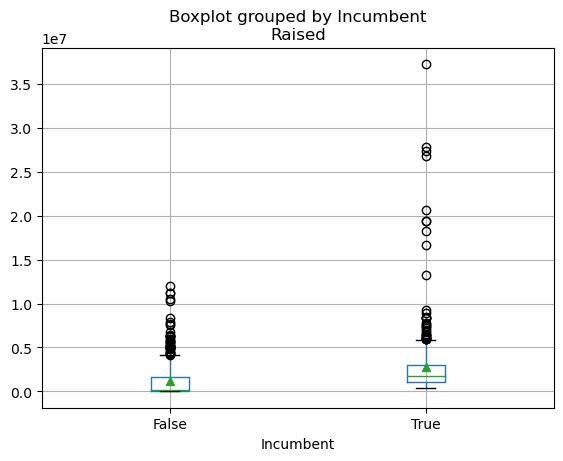

In [33]:
# imr = hor.boxplot(column= 'Raised', by= 'Incumbent', showmeans=True);
# imr

KeyError: 'Incumbent'

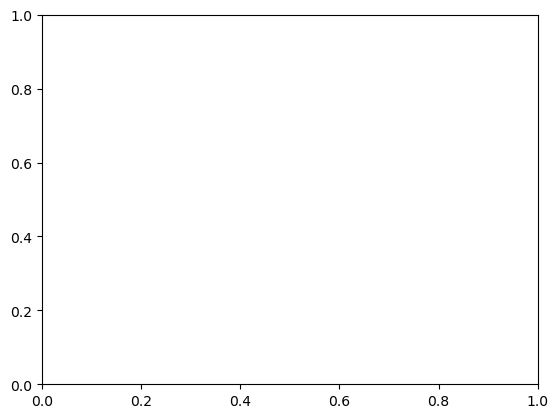

In [34]:
# can't get plot to plot

ax = hor.plot(x = 'Incumbent', y = 'Raised', kind = 'scatter')

fit_df = pd.DataFrame({
    'Raised': np.linspace(
        start = hor['Raised'].min(),
        stop = hor['Raised'].max())})
fit_df['fitted'] = lm.predict(fit_df)

fit_df.plot(x = 'Raised', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

In [61]:
# create Loser df
hor_losers = hor[hor['Winner']== False]
hor_losers

,Candidate,Party,State,District,Incumbent,Winner,Percentage of Vote,Raised,Spent,Funds Remaining,RaisedRank,Top Raised
1,James Averhart,(D),Alabama,District 01,False,False,35.0,80095,78973,1122,2.0,False
3,Phyllis Harvey-Hall,(D),Alabama,District 02,False,False,34.6,56050,55988,0,2.0,False
5,Adia Winfrey,(D),Alabama,District 03,False,False,32.4,50273,40971,43,2.0,False
11,Alyse Galvin,(I),Alaska,District 01,False,False,45.3,5178452,5088103,96594,1.0,True
13,Tiffany Shedd,(R),Arizona,District 01,False,False,48.4,1675618,1615704,63347,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
873,Tom Palzewicz,(D),Wisconsin,District 05,False,False,39.9,370392,371799,0,2.0,False
875,Jessica King,(D),Wisconsin,District 06,False,False,40.7,287753,245788,41965,2.0,False
877,Tricia Zunker,(D),Wisconsin,District 07,False,False,39.2,1261957,1232690,29267,2.0,False
879,Amanda Stuck,(D),Wisconsin,District 08,False,False,36.0,416978,399916,2165,2.0,False


In [63]:
#sort loser df by amount raised
hor_losers = hor_losers.sort_values('Raised', ascending = False)
hor_losers

,Candidate,Party,State,District,Incumbent,Winner,Percentage of Vote,Raised,Spent,Funds Remaining,RaisedRank,Top Raised
430,Lacy Johnson,(R),Minnesota,District 05,False,False,25.8,12050564,12000896,49668,1.0,True
536,John C. Cummings,(R),New,York District 14,False,False,30.5,11140937,10947758,193228,2.0,False
116,Joe Collins,(R),California,District 43,False,False,28.3,10556626,9921103,635523,1.0,True
765,Wendy Davis,(D),Texas,District 21,False,False,45.4,10263486,10201874,61611,1.0,True
529,Max Rose,(D),New,York District 11,True,False,42.0,9284434,9499242,23184,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
514,Joshua Sauberman,(I),New,York District 03,False,False,NaN,127,270,-2258,3.0,False
519,Amit Lal,(I),New,York District 05,False,False,NaN,126,0,126,2.0,False
750,Michael David Sanchez,(I),Texas,District 14,False,False,NaN,100,12,88,4.0,False
190,Kristofer Steven Lawson,(I),Florida,District 10,False,False,NaN,47,47,0,3.0,False


In [64]:
# mean raised by losers
hor_losers['Raised'].mean()

1076493.7483443709

In [65]:
#max raised by losers
hor_losers[['Raised']].head()

,Raised
430,12050564
536,11140937
116,10556626
765,10263486
529,9284434


In [67]:
#min raised by losers
hor_losers['Raised'].tail()

514     127
519     126
750     100
190      47
633   -2084
Name: Raised, dtype: int64